## 类别变量

例如，一种水果的颜色或者一个公司的名称。类别特征的挑战是它们不以连续方式发生变化，这就使得很难用数字表示它们。

In [1]:
data = [
    {'name': 'Alan Turing', 'born': 1912, 'died': 1954},
    {'name': 'Herbert A. Simon', 'born': 1916, 'died': 2001},
    {'name': 'Jacek Karpinski', 'born': 1927, 'died': 2010},
    {'name': 'J.C.R. Licklider', 'born': 1915, 'died': 1990},
    {'name': 'Marvin Minsky', 'born': 1927, 'died': 2016},
]

born和died特征已经是数值格式了，name特征的编码有些复杂。用下列方式编码这些特征，我们可能会很感兴趣：

In [2]:
{'Alan Turing': 1,
 'Herbert A. Simon': 2,
 'Jacek Karpinsky': 3,
 'J.C.R. Licklider': 4,
 'Marvin Minsky': 5};

虽然这看起来是个好办法，但是从机器学习的角度来看，这并没有多大意义。为什么会没有意义呢？通过给这些类别分配序数值，大多数机器学习算法会继续认为Alan Turing < Herbert A. Simon < Jacek Karpsinky，因为1<2<3。这显然不是我们想说的。

我们真正想说的包括第1个数据点属于Alan Turing类别，不属于Herbert A.Simon类别和Jacek Karpsinky类别。或者说，我们正在寻找一种二进制编码。用机器学习的术语来说，这被称为独热编码（one-hot encoding），它由大多数机器学习包直接提供，所见即所得（当然，OpenCV除外）。

在scikit-learn中，独热编码是由DictVectorizer类提供的，它可以在feature_extraction模块中找到。其工作方式是只需将包含数据的一个字典送入fit_transform函数，该函数自动确定编码哪些特征：

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[1912, 1954,    1,    0,    0,    0,    0],
       [1916, 2001,    0,    1,    0,    0,    0],
       [1927, 2010,    0,    0,    0,    1,    0],
       [1915, 1990,    0,    0,    1,    0,    0],
       [1927, 2016,    0,    0,    0,    0,    1]])

In [4]:
# 调用get_feature_names查看特征的排列顺序：
vec.get_feature_names()

['born',
 'died',
 'name=Alan Turing',
 'name=Herbert A. Simon',
 'name=J.C.R. Licklider',
 'name=Jacek Karpinski',
 'name=Marvin Minsky']

scikit-learn提供了稀疏矩阵的一种紧凑表示，我们可以在第一次调用DictVectorizer时，通过指定sparse=True来触发：

In [5]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<5x7 sparse matrix of type '<class 'numpy.int32'>'
	with 15 stored elements in Compressed Sparse Row format>

## 文本特征

In [6]:
sample = [
    'feature engineering',
    'feature selection',
    'feature extraction'
]

对这样的数据进行编码的一种最简单方法是单词计数；对于每个短语，我们只计算这个短语内每个单词出现的次数。在scikit-learn中，这使用CountVectorizer很容易实现，功能与DictVectorizer类似：

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

在默认情况下，这将以稀疏矩阵形式来存储我们的特征矩阵X。如果我们想要手动查看该矩阵，需要将其转换成一个常规数组：

In [8]:
X.toarray()

array([[1, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]], dtype=int64)

In [9]:
vec.get_feature_names()

['engineering', 'extraction', 'feature', 'selection']

这个方法可能存在的一个缺点是，我们可能过于关注频繁出现的单词了。解决该问题的方法是词频–逆文本频率（Term Frequency-Inverse DocumentFrequency，TF-IDF）。TF-IDF所做的事情比它的名字更容易理解，TF-IDF基本上是通过度量单词在整个数据集中出现的频率来衡量单词数量。

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
X.toarray()

array([[0.861037  , 0.        , 0.50854232, 0.        ],
       [0.        , 0.        , 0.50854232, 0.861037  ],
       [0.        , 0.861037  , 0.50854232, 0.        ]])

## 图像表示

表示图像最直接的方式可能是使用图像中每个像素的灰度值。通常，灰度值并不能很好地表示它们所描述的数据。例如，如果我们看到灰度值为128的一个像素，我们能够分辨出这个像素属于哪个物体吗？可能分辨不出这个像素属于哪个物体。因此，灰度值不是很有效的图像特征。

### 使用颜色空间

#### 在RGB空间中编码图像

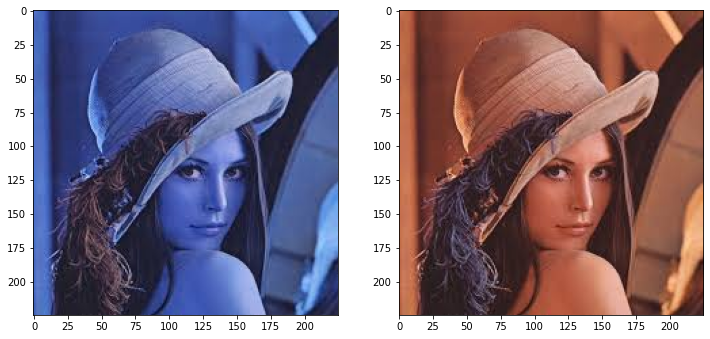

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 使用cv2.imread可以加载BGR格式的一个示例图像：
img_bgr = cv2.imread('data/lena.jpg')
# Matplotlib需要的是一个RGB图像。为此，我们必须使用cv2.cvtColor来重新排列颜色通道：
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_bgr)
plt.subplot(122)
plt.imshow(img_rgb);

#### 在HSV和HLS空间中编码图像

HSV（色调Hue、饱和度Saturation和值Value的简写）

HLS（色调Hue、亮度Lightness和饱和度Saturation的简写）

OpenCV提供了各种各样额外的颜色空间，它们可以通过cv2.cvtColor获得。我们所要做的是用下面的一种颜色空间代替颜色标志：
* HLS使用cv2.COLOR_BGR2HLS。
* LAB（明度、绿–红、蓝–黄）使用cv2.COLOR_BGR2LAB。
* YUV（整体亮度、蓝色亮度和红色亮度）使用cv2.COLOR_BGR2YUV。

### 检测图像中的角点

OpenCV提供了至少两种寻找图像中的角点的不同算法：
* Harris角点检测：边缘是在各个方向上都具有高密度变化的区域，Harris和Stephens想出了找到这些位置的一种快速方法。在OpenCV中，这个算法实现为cv2.cornerHarris。
* Shi-Tomasi角点检测：Shi和Tomasi有他们自己的构建好的追踪特征的想法，通常寻找N个最强的角点他们比Harris角点检测效果更好。在OpenCV中，这个算法实现为cv2.goodFeaturesToTrack。

In [12]:
# Harris角点检测只适用于灰度图像，因此，首先我们要将BGR图像转换为灰度图像：
img_bgr = cv2.imread('data/rubic-cube.png')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

该算法需要一个输入图像、用于角点检测的像素邻域大小（blockSize）、用于边缘检测的一个孔径参数（ksize）以及所谓的Harris检测器自由参数（k）：

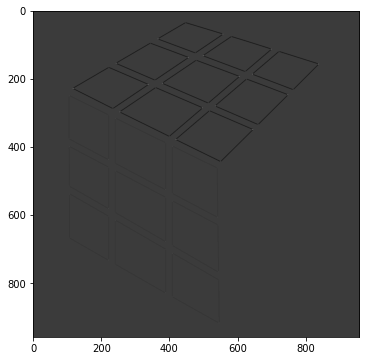

In [13]:
corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
plt.figure(figsize=(12,6))
plt.imshow(corners, cmap='gray')

角点图中的每个像素都有由Harris角点检测技术返回的一个值。我们只关注那些值大于最大值10%的点。这也可以使用cv2.threshold函数来实现。

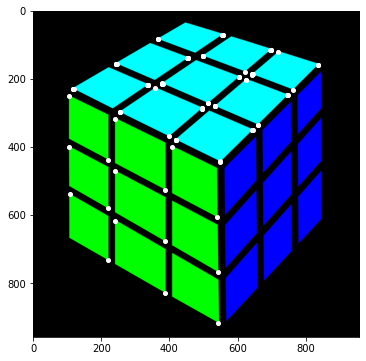

In [14]:
corners_to_plot = np.where(corners>0.1*corners.max())
plt.figure(figsize=(12,6))
plt.imshow(img_bgr);
plt.plot(corners_to_plot[1],corners_to_plot[0],'o',c='w',markersize=4)

尽管Harris角点检测技术速度快，但是结果并不是很准确。这可以通过用亚像素精度细化检测到的角点。OpenCV为此提供了cv2.cornerSubPix函数。

首先，我们使用cv2.threshold函数改变角点图中大于最大值10%处的像素值。我们将阈值图像转换为一个8位的无符号整数。

In [15]:
ret, corners = cv2.threshold(corners,0.1*corners.max(),255,0)
corners = np.uint8(corners)

使用cv2.connectedComponentsWithStats函数计算角点的中心点。这解决了多个角点彼此之间非常近的情况。这可能是因为存在一些噪声或者不适合的参数，或者实际上附近可能有多个角点。在任何情况下，我们都不想浪费计算能力来为每个检测到的近距离的角点计算更精确的角点：

In [16]:
retVal, labels, stats, centroids = cv2.connectedComponentsWithStats(corners)

把中心点连同停止标准一起传递给cv2.cornerSubPix函数。这个停止标准定义了何时停止迭代的条件。

In [17]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(img_gray,np.float32(centroids),(5,5),(-1,-1),criteria)

把这些新的角点转换回整数类型：

In [18]:
corners = np.int0(corners)
centroids = np.int0(centroids)

画出这些新的点，并比较视觉上的变化：

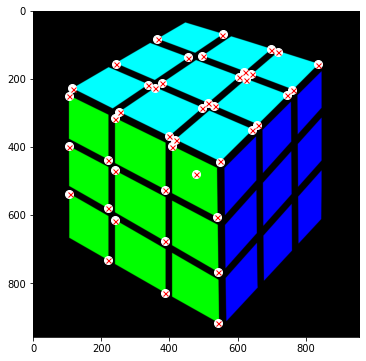

In [19]:
corners_to_plot = [corners[:,0],corners[:,1]]
centroids_to_plot = [centroids[:,0],centroids[:,1]]
plt.figure(figsize=(12,6))
plt.imshow(img_bgr);
plt.plot(corners_to_plot[0],corners_to_plot[1],'o',c='w',markersize=8)
plt.plot(centroids_to_plot[0],centroids_to_plot[1],'x',c='r',markersize=5)

看起来位置上没有任何明显的变化，但是让我们通过一些计算再仔细看看。首先，我们将计算中心点和新中心位置之间的绝对距离之和：

In [20]:
np.absolute(centroids-corners).sum(axis=0)

array([41, 31], dtype=int64)

让我们看看这些数字对图像大小意味着什么：

In [21]:
height, width, channels = img_bgr.shape
np.absolute(centroids-corners).sum(axis=0)/(width,height) * 100

array([4.27974948, 3.23590814])

从总体上说，在x方向上宽度的变化为4.28%，在y方向上高度的变化为3.23%。

### 使用star检测器和BRIEF描述符

特征检测器识别图像中的关键点，特征描述符计算所有关键点的实际特征值。

1）首先，让我们读取图像，将其转换为灰度：

In [22]:
img = cv2.imread('data/rubic-cube.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

2）现在，我们将创建特征检测器和描述符：

In [23]:
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

3）接下来，是时候使用star检测器获取关键点，并将其传递给BRIEF描述符了：

Number of keypoints = 453


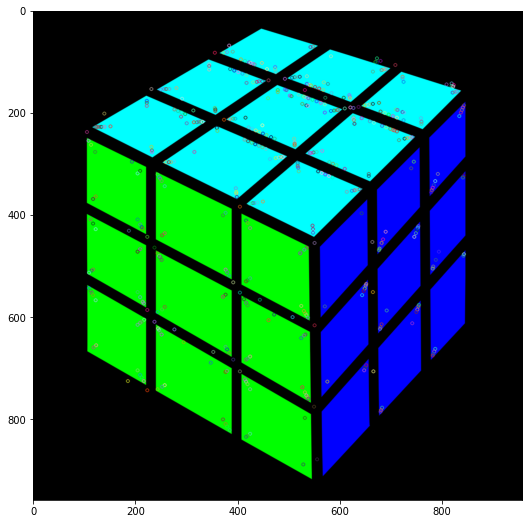

In [24]:
keyPoints = star.detect(gray, None)
keyPoints, descriptors = brief.compute(img, keyPoints)
result = cv2.drawKeypoints(img, keyPoints, outImage=None)
print("Number of keypoints = {}".format(len(keyPoints)))
plt.figure(figsize=(18,9))
plt.imshow(result)

### 使用面向FAST和可旋转的BRIEF

Number of keypoints = 497


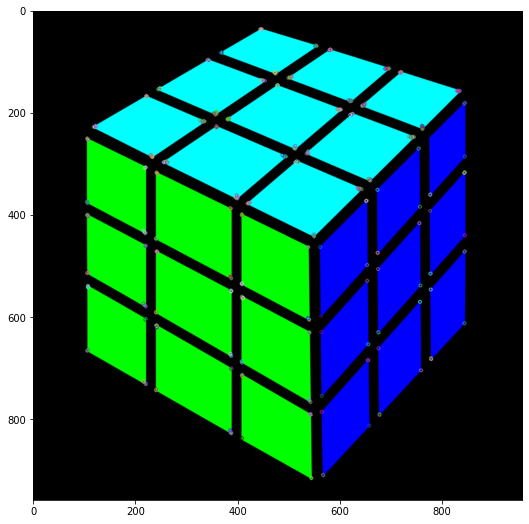

In [25]:
img = cv2.imread('data/rubic-cube.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
keyPoints = orb.detect(gray,None)
keyPoints, descriptors = orb.compute(gray, keyPoints)
print("Number of keypoints = {}".format(len(keyPoints)))
result = cv2.drawKeypoints(img,keyPoints,outImage=None)
plt.figure(figsize=(18,9))
plt.imshow(result)

使用orb.detectAndCompute函数可以把检测和描述步骤合并成一个步骤，如下所示：

In [26]:
img = cv2.imread('data/rubic-cube.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
keyPoints2, descriptors2 = orb.detectAndCompute(gray, None)
print("Number of keypoints = {}".format(len(keyPoints)))
np.allclose(descriptors,descriptors2)

Number of keypoints = 497


True